# Stroop effect investigation
[Cédric Campguilhem](https://github.com/ccampguilhem/Udacity-DataAnalyst), September 2017

<a id='Top'/>

## Table of contents

- [Introduction](#Introduction)
- [Stroop effect experiment](#Stroop effect experiment)
- [Descriptive statistics](#Descriptive statistics)
- [Inferential statistics](#Inferential statistics)
    - [Hypothesis](#Hypothesis)
    - [Checking assumptions](#Checking assumptions)
    - [Critical t-value](#Critical t-value)
    - [t-statistic and decision](#t-statistic)
    - [Additional information](#Additional information)
- [Conclusion](#Conclusion)
- [Appendix](#Appendix)

<a id='Introduction'/>

## Introduction

This project is related to Inferential Statistics course for Udacity Data Analyst Nanodegree program. The purpose of this project is to investigate a phenomenon from the experimental psychology called [Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect).

The project aims at investigating experimental results on a sample. We will use both descriptive and inferential statistics (hypothesis formulation and decision).

The project makes use of of Python language with [pandas](http://pandas.pydata.org/) for calculation parts and [seaborn](https://seaborn.pydata.org/) library for plotting.

<a id='Stroop effect experiment'/>

## Stroop effect experiment *[top](#Top)*

The experiment consists in saying out loud the ink color in which a words in a list are printed. The participants are given two different lists of words naming colors. A **congruent** one in which words match the ink color and a **incongruent** list where words are different from ink color:

<div style="width: 100%; display: flex; flex-wrap: wrap">
    <div style="width: 50%; padding: 5px">
        <img alt="Congruent list" src="./stroopa.gif"/>
    </div>
    <div style="width: 50%; padding: 5px">
        <img alt="Congruent list" src="./stroopb.gif"/>
    </div>
</div>
<div style="width: 100%; display: flex; flex-wrap: wrap">
    <div style="width: 50%; padding: 5px; text-align: center">
        Congruent list
    </div>
    <div style="width: 50%; padding: 5px; text-align: center">
        Incongruent list
    </div>
</div>
<div style="width: 100%; display: flex; flex-wrap: wrap">
    <div style="width: 100%; padding: 5px; text-align: center">
        <a href="https://faculty.washington.edu/chudler/java/ready.html">Source: faculty.washington.edu</a>
    </div>
</div>

The time (in seconds) it takes to each participant to enumerate ink colors is recorded for each list. The type of list (congruent or incongruent) is the **independent** variable in the experiment. The time it takes to go through the list is the **dependent** variable.

This experiment is a **dependent** sample experiment: the same participants are given both lists.

In [1]:
#Import required libraries for project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read dataset
df = pd.read_csv('./dataset/stroopdata.csv')

As an example, here are the first ten participants recorded times for each list:

In [3]:
df[:10].transpose().head()

,0,1,2,3,4,5,6,7,8,9
Congruent,12.079,16.791,9.564,8.630,14.669,12.238,14.692,8.987,9.401,14.480
Incongruent,19.278,18.741,21.214,15.687,22.803,20.878,24.572,17.394,20.762,26.282


<a id='Descriptive statistics'/>

## Descriptive statistics *[top](#Top)*

We first make a descriptive analysis of our groups. The following box plot shows distribution of recorded time for each list:

In [4]:
#We re-organize table 
df2 = df.stack().reset_index(level=1, name='time').rename(columns={"level_1": "list"})
df2 = df2.reset_index().rename(columns={"index": "participant"})

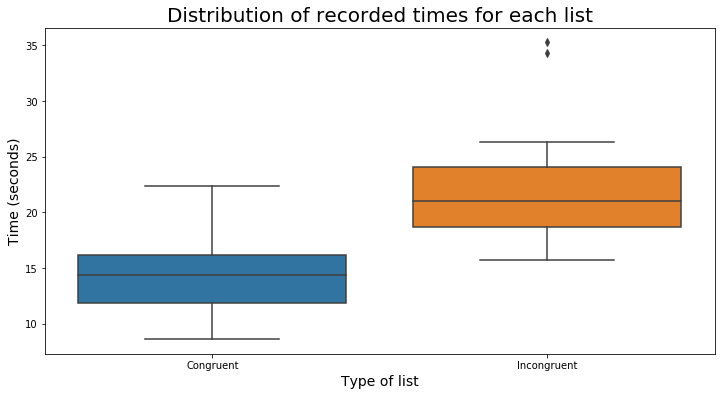

In [5]:
figure = plt.figure(figsize=(12, 6))
ax = figure.add_subplot(111)
ax = sns.boxplot(x="list", y="time", data=df2, ax=ax);
texts = ax.set(xlabel='Type of list', ylabel='Time (seconds)', title='Distribution of recorded times for each list')
texts[0].set_fontsize(14)
texts[1].set_fontsize(14)
texts[2].set_fontsize(20)



Each box represents three quartiles (25%, mean and 75%) in addition to 1.5 interquartile range past the low and high quartiles. Participant time out of the interquartile range are reported as outliers (diamond markers).

In average, time it takes to go through seems higher in average for incongruent list (below 15 seconds in average for congruent list and above 20 seconds for non-congruent list). At this time, there is no evidence that this observation is statistically significant. To do that, we need to formulate an hypothesis. This will be the object of [next](#Inferential statistics) section.

For incongruent list, two recorded times are above the 1.5 interquartile range and are reported as outliers.

We can have a closer look at distributions:

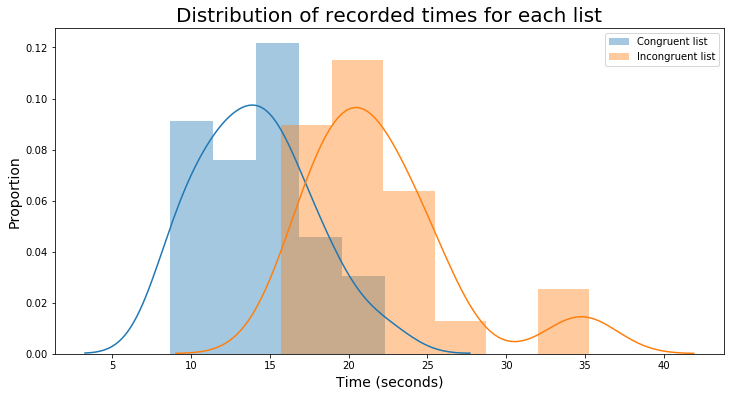

In [6]:
figure = plt.figure(figsize=(12, 6))
ax = figure.add_subplot(111)
ax = sns.distplot(df2[df2["list"] == "Congruent"]["time"], label="Congruent list", ax=ax);
ax = sns.distplot(df2[df2["list"] == "Incongruent"]["time"], label="Incongruent list", ax=ax);
ax.legend()
texts = ax.set(xlabel='Time (seconds)', ylabel='Proportion', title='Distribution of recorded times for each list')
texts[0].set_fontsize(14)
texts[1].set_fontsize(14)
texts[2].set_fontsize(20)

If we refer to kernel density estimators, we can see that distribution of recorded times for congruent list looks like a normal distribution. On the contrary, results for incongruent list differs from a normal distribution due to the outliers who have response time for experiment between 32 and 35.

The actual values for mean, standard deviation and quartiles are reported in the table below:

In [7]:
df2.groupby("list").describe()["time"]

,count,mean,std,min,25%,50%,75%,max
list,,,,,,,,
Congruent,24.0,14.051125,3.559358,8.630,11.89525,14.3565,16.20075,22.328
Incongruent,24.0,22.015917,4.797057,15.687,18.71675,21.0175,24.05150,35.255


In the above table, the standard deviation reported is a sample standard deviation taking into account [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction):

\begin{align}
\sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n - 1}}
\end{align}

<a id='Inferential statistics'/>

## Inferential statistics *[top](#Top)*

<a id='Hypothesis'/>

### Hypothesis *[inferential](#Inferential statistics)*

In [previous](#Descriptive statistics) section, we have observed that average response time for incongruent list seems higher than the one recoded for congruent list. In this section, we want to know if this observation is statistically significant.

Before doint a t-test, we need to take several assumptions ([source](https://statistics.laerd.com/stata-tutorials/paired-t-test-using-stata.php)):
- The dependent variable should be continuous, which is the case in our case because we use time as dependent variable.
- The independent variable should consist of two categorical, related groups or matched pairs. In our case we have related groups: each participant is given the two different lists.
- There should be no significant outliers in the difference between the two related groups.
- The distribution of the differences in the dependent variable between the two related groups should be approximately normally distributed.

The last two assumptions need to be checked.

Let's formulate the problem this way. Our **null hypothesis** is that population mean response times for congruent ($\mu_{congruent}$) and incongruent ($\mu_{incongruent}$) lists are the same. Our **alternative** is that population mean reponse time for incongruent list is higher.

For this one-tailed, dependant sample [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test), we choose to use an alpha level of 0.05:

\begin{equation}
\mathtt{H}_{0}: \mathtt{\mu}_{congruent} = \mathtt{\mu}_{incongruent} \\
\mathtt{H}_{A}: \mathtt{\mu}_{congruent} < \mathtt{\mu}_{incongruent} \\
\alpha = 0.05
\end{equation}

Let's set $\mathtt{\mu}_D = \mathtt{\mu}_{incongruent} - \mathtt{\mu}_{congruent}$ . The hypotheses may be re-written as follow:

\begin{equation}
\mathtt{H}_{0}: \mathtt{\mu}_{D} = 0 \\
\mathtt{H}_{A}: \mathtt{\mu}_{D} > 0 \\
\alpha = 0.05
\end{equation}

The problem is then a one-tailed t-test in positive direction.

In this problem, the degree of freedom is $n - 1$:

\begin{equation}
dof = n - 1 = 23
\end{equation}

where $n$ is the sample size (24).

<a id='Checking assumptions'/>

### Checking assumptions *[inferential](#Inferential statistics)*

Before performing t-test, we need to check the following two remaining assumptions:

- There should be no significant outliers in the differences between the two related groups.
- The distribution of the differences in the dependent variable between the two groups should be approximately normally distributed.

In [8]:
#We first calculate the difference:
df['difference'] = df["Incongruent"] - df["Congruent"]
df.head()

,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


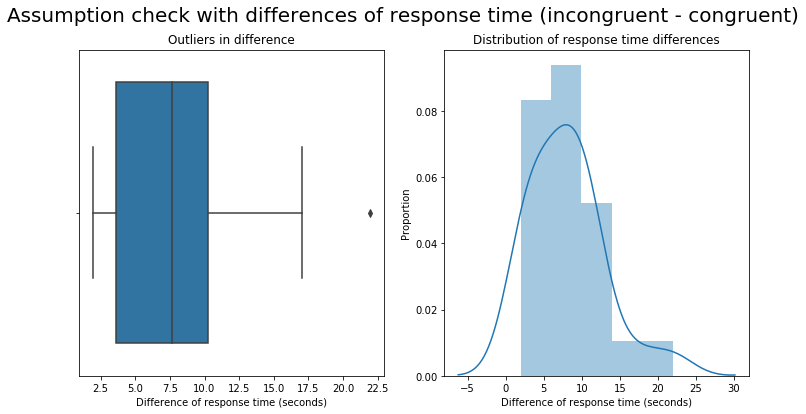

In [9]:
#Now we can make a boxplot to find outliers and a distplot
figure = plt.figure(figsize=(12, 6))
figure.suptitle("Assumption check with differences of response time (incongruent - congruent)", fontsize=20)
ax = figure.add_subplot(121)
ax = sns.boxplot(x="difference", data=df, ax=ax);
texts = ax.set(xlabel='Difference of response time (seconds)', title='Outliers in difference')
ax = figure.add_subplot(122)
ax = sns.distplot(df["difference"], label="Response time (seconds)", ax=ax);
texts = ax.set(xlabel='Difference of response time (seconds)', ylabel='Proportion', 
               title='Distribution of response time differences')

There is one difference of response time identified as an outlier (above the 1.5 interquartile limit past the high quartile). In the right-hand picture, we can also see that the distribution differs from a uniform distribution because of a bump around 20 seconds. We cannot formally validate all assumptions with this dataset.

<a id='Critical t-value'>

### Critical t-value *[inferential](#Inferential statistics)*

From [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg) we can get the critical value for $dof = 23$ and $\alpha = 0.05$ for a one-tailed t-test:

\begin{equation}
t_{critical} = 1.714
\end{equation}

If the t-statistic of our sample is greater than this value, then we may reject the null hypothesis.

<a id='t-statistic'/>

## t-statistic and decision *[inferential](#Inferential statistics)*

t-statistic may be calculated this way:

\begin{equation}
t = \frac{\bar{x} - \bar{\mu}_{E}}{\frac{s}{\sqrt{n}}}
\end{equation}

Where $\bar{x}$ is the difference of the sample means, $s$ is the standard deviation of the samples mean, $n$ is the sample size and $\bar{\mu}_E$ is the expected difference of mean from null hypothesis. In our case we have $\bar{\mu}_E = 0$.

The standard deviation of the sample means is calculated with:

\begin{equation}
s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}
\end{equation}

In [10]:
df["difference"].describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: difference, dtype: float64

In [11]:
import math
t = df["difference"].mean() / (df["difference"].std() / math.sqrt(24))
print t

8.02070694411


Our sample has the following statitics $M = 7.96$, $SD = 4.86$ (rounded two decimal places).

The t-statistic is $t(23) = 8.02, p < .0001$ one-tailed positive direction.

As p-value is below the selected alpha level of 0.05, we **reject the null hypothesis**. This means that mean of response times with incongruent list is **	extremely significantly** higher than the mean of response times with congruent list.

As this is an experiment, we can also state that incongruent list **causes** higher response times.

<a id='Additional information'/>

### Additional information *[inferential](#Inferential statistics)*

In this section, we provide a 95% confidence interval for mean of differences of response time, and effect size parameters: Cohen's $d$ and $r^2$.

Cohen's d is the ratio of mean differences of response time and standard deviation of sample means:

\begin{equation}
d = \frac{\bar{x}}{s}
\end{equation}

$r^2$ parameter is:

\begin{equation}
r^2 = \frac{t^2}{t^2 + dof}
\end{equation}

Where $dof$ is the degree of freedom. In our case we have $d = 1.64, r^2 = .74$. This means that incongruent list explains 74% of differences of response time.

The margin of error is calculated with:

\begin{equation}
margin = t_{critical}.s
\end{equation}

Where $s$ is the standard deviation of differences of response time and $t_{critical}$ is the t value for $\alpha = 0.05$ two-tailed (95% confidence interval): 2.069.

Margin of error is 10.07 seconds. The 95% confidence interval:

\begin{equation}
95\% CI = \bar{x} \pm margin 
\end{equation}

where $\bar{x}$ is the mean of differences of response time, is then:

95% CI = (-2.10, 18.03)

This means that if poupaltion takes the Stroop test then we expect to have an average of differences of response time between incongruent and congruent list between -2.10 and 18.03 seconds.

In [16]:
#Cohen's d
d = df["difference"].mean() / (df["difference"].std())
print "d = ", d

#r2
r2 = t**2 / (t**2 + 23)
print "r2 = ", r2

#Margin of error
margin = 2.069 * df["difference"].std()
print "margin = ", margin

#95% confidence interval
CI = (df["difference"].mean() - margin, df["difference"].mean() + margin)
print "95% CI = ({:.2f}, {:.2f})".format(CI[0], CI[1])

d =  1.63721994912
r2 =  0.736636416145
margin =  10.0653268775
95% CI = (-2.10, 18.03)


<a id='Conclusion'/>

## Conclusion *[top](#Top)*

In this project, we have conducted a t-test with a paired (dependent) sample. As this was an Stroop effect experiment, we have concluded that using an incrogruent list causes slower response time compared to a congruent list.

However, two assumptions regarding our sample (distribution should be like a normal distribution and presence of outliers) have been violated. Outlier presence affects both sample mean and sample standard deviation and t-statistic as a consequence. In this case a nonparametric test may be [prefered](http://www.basic.northwestern.edu/statguidefiles/ttest_unpaired_ass_viol.html).

The Stroop test highlights how humain brain processes differently words and colors. In his experiment, John Ridley Stroop also had a third neutral list where words naming different things than colors (animals for example). This third list showed faster response time than the incongruent list, proving the reduced level of interference.

The Stroop test has multiple applications, one of which is to gauge children brain development (it has been shown that interferences reduce from childhood to adulthood). Higher level of interferences are often associated with brain troubles such as Attention-Deficit Hyperactivity Disorder.

Sources: (https://en.wikipedia.org/wiki/Stroop_effect), (https://powersthatbeat.wordpress.com/2012/09/16/what-are-the-different-tests-for-the-stroop-effect-autismaid/), (https://imotions.com/blog/the-stroop-effect/).

<a id='Appendix'/>

## Appendix *[top](#Top)*

### References

Re-organization of panda dataframe on [StackOverflow](https://stackoverflow.com/questions/38241933/how-to-convert-column-names-into-column-values-in-pandas-python).<hr>
Paired t-test [assumptions](https://statistics.laerd.com/stata-tutorials/paired-t-test-using-stata.php).<hr>
Hypothesis testing on [Stat Trek](http://stattrek.com/hypothesis-test/hypothesis-testing.aspx).<hr>
One-tail and two-tailed tests().<hr>
Violation of [t-test assumptions](http://www.basic.northwestern.edu/statguidefiles/ttest_unpaired_ass_viol.html).<hr>
Statistical calculations with [GraphPad](http://www.graphpad.com/quickcalcs/).<hr>

In [17]:
#Export to html
!jupyter nbconvert --to html --template html_minimal.tpl inferential_statistics.ipynb

[NbConvertApp] Converting notebook inferential_statistics.ipynb to html
[NbConvertApp] Writing 373752 bytes to inferential_statistics.html
